<a href="https://colab.research.google.com/github/SandrineLpx/Portfolio/blob/main/IndividualAssignment2_SLepesqueux.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Individual Assignment 2 - Sandrine Lepesqueux

In [19]:
# Import packages
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/ApplianceShipments.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Year       20 non-null     int64
 1   Quarter    20 non-null     int64
 2   Shipments  20 non-null     int64
dtypes: int64(3)
memory usage: 612.0 bytes


## Question 1

### 1.1

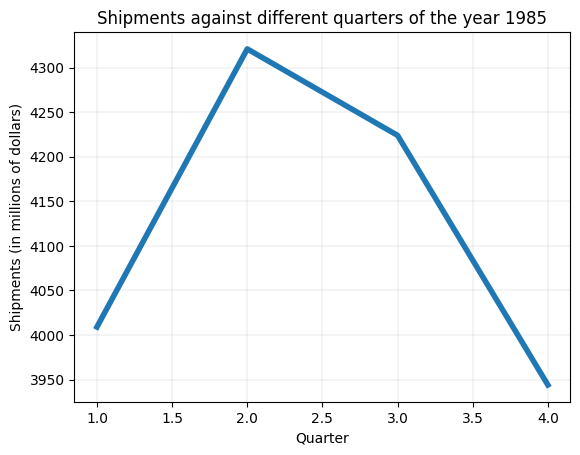

In [21]:
#1.1

# Shipments against different quarters of the year 1985

# Filter Dataframe for the year 1985
df_1985 = df[df['Year'] == 1985]

# Generate line plot
plt.plot(df_1985['Quarter'], df_1985['Shipments'], linewidth=4)
plt.xlabel('Quarter')
plt.ylabel('Shipments (in millions of dollars)')
plt.title('Shipments against different quarters of the year 1985')
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5) # Add grid for better readibility
plt.show()

### 1.2

[]

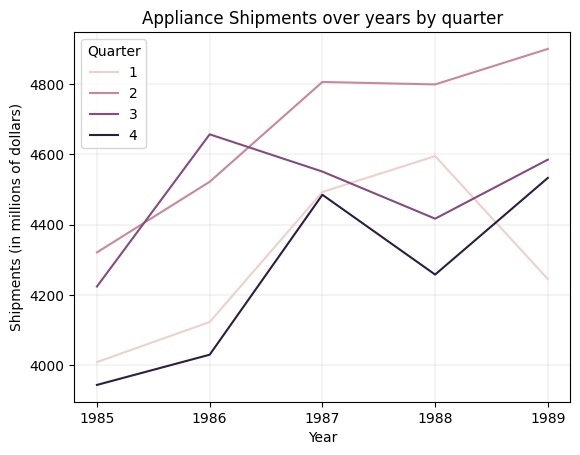

In [22]:
#1.2

# Create seaborn line plot
sns.lineplot(df, x='Year', y='Shipments', hue='Quarter')
plt.xlabel('Year')
plt.ylabel('Shipments (in millions of dollars)')
plt.title('Appliance Shipments over years by quarter')
plt.xticks(df['Year'].unique())  # Display years as integers
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5) # Add grid for better readibility
plt.plot()

### 1.3

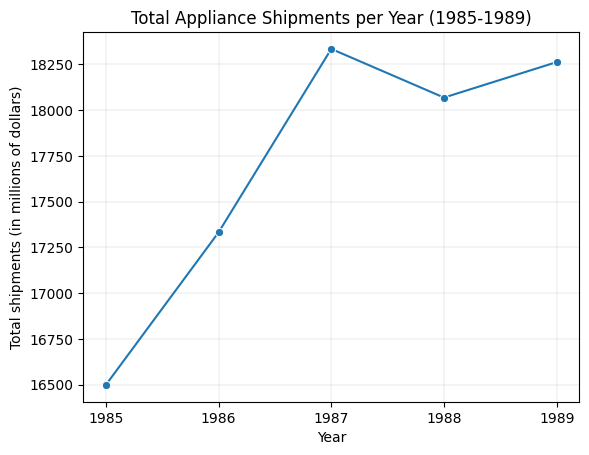

In [23]:
#1.3

# Aggregate total shipments per year
df_yearly = df.groupby('Year')['Shipments'].sum().reset_index()

# Plot with Seaborn
sns.lineplot(df_yearly, x='Year', y='Shipments', marker = 'o')
plt.xlabel('Year')
plt.ylabel('Total shipments (in millions of dollars)')
plt.title('Total Appliance Shipments per Year (1985-1989)')
plt.xticks(df['Year'].unique())  # Display years as integers
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

## Question 2

In [24]:
df_AB = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/AB_NYC_2019.csv')
print(df_AB.info())
df_AB.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9946 entries, 0 to 9945
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   9946 non-null   int64  
 1   name                 9939 non-null   object 
 2   host_id              9946 non-null   int64  
 3   host_name            9943 non-null   object 
 4   neighbourhood_group  9946 non-null   object 
 5   neighbourhood        9946 non-null   object 
 6   latitude             9946 non-null   float64
 7   longitude            9946 non-null   float64
 8   room_type            9946 non-null   object 
 9   price                9946 non-null   int64  
 10  minimum_nights       9946 non-null   int64  
 11  number_of_reviews    9946 non-null   int64  
 12  last_review          7978 non-null   object 
 13  availability_365     9946 non-null   int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.1+ MB
None


,0
id,9946
name,9868
host_id,8878
host_name,4057
neighbourhood_group,5
neighbourhood,201
latitude,7681
longitude,6791
room_type,3
price,410


### 2.1

In [31]:
#2.1

# Number of Airbnb located in Brooklyn
nb_AB_Brooklyn = df_AB[df_AB['neighbourhood_group'] == 'Brooklyn'].shape[0]

# Average number of reviews for all listings in Brookklyn
avg_reviews_Brooklyn = df_AB[df_AB['neighbourhood_group'] == 'Brooklyn']['number_of_reviews'].mean()

# Number of listings that requiring stays longer than 30 nigths
nb_AB_min_stay_30 = df_AB[df_AB['minimum_nights'] > 30].shape[0]

# Average price for Manhattan
avg_price_Manhattan = df_AB[df_AB['neighbourhood_group'] == 'Manhattan']['price'].mean()

# Average price for Brooklyn
avg_price_Brooklyn = df_AB[df_AB['neighbourhood_group'] == 'Brooklyn']['price'].mean()

# Average price for Queens
avg_price_Queens = df_AB[df_AB['neighbourhood_group'] == 'Queens']['price'].mean()

# Print the results
print(f"1) Number of Airbnb listings in Brooklyn: {nb_AB_Brooklyn}")
print(f"2) Average number of reviews for Brooklyn listings: {avg_reviews_Brooklyn}")
print(f"3) Number of listings requiring stays longer than 30 nights: {nb_AB_30}")
print(f"4) Average price for Manhattan (in USD): {avg_price_Manhattan}")
print(f"Average price for Brooklyn (in USD): {avg_price_Brooklyn}")
print(f"Average price for Queens (in USD): {avg_price_Queens}")




1) Number of Airbnb listings in Brooklyn: 4094
2) Average number of reviews for Brooklyn listings: 24.077186126038104
3) Number of listings requiring stays longer than 30 nights: 129
4) Average price for Manhattan (in USD): 175.97854671280277
Average price for Brooklyn (in USD): 115.48241328773815
Average price for Queens (in USD): 94.80897009966777


### 2.2

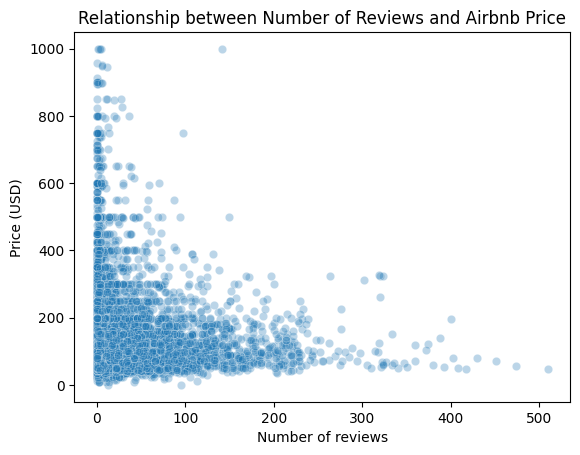

In [49]:
#2.2

# Create scatter plot
sns.scatterplot(data = df_AB, x='number_of_reviews', y='price', alpha = 0.3)
plt.xlabel('Number of reviews')
plt.ylabel('Price (USD)')
plt.title('Relationship between Number of Reviews and Airbnb Price')
plt.show()

**Observed Patterns:**
- The scatter plot reveals a dense cluster of listings in the lower left corner of the chart, indicating that a large number of listings have relatively low prices (under \$200) and a number of reviews typically under 100.
- As the prices increases, the number of reviews becomes sparse.
- At lower price points there is a horizontal spread of data points, indicating that lower prices tend to have a wide range of number of reviews.
- For listing with fewer reviews, there is a vertical spread of data points, indicating that these listings can have a wide range of prices.
- Some data points have a high number of reviews and more expensive than the majority of the listings in this range. For example one listing at $1000 has ~150 reviews. Those would be considered as outliers as they are scattered and less frequent.

**Overall, the plot suggest that as price increases, the number of reviews per listing generally decreases. This trend may be explained by several factors:**
- **Affordability:** More expensive the Airbnb is, less accessible resulting in fewer bookings and consequently fewer reviews.
- **Exclusivity:** Luxury rentals usually target a smaller group of people, looking for something special, so they get booked less often and have fewer reviews.
- **Minimum stay requirements**: Expensive listings may have stricter minimum stay policies, further reducing the number of bookings and reviews.
- **Guest expectations/Perceived values**: Guests paying more typically have higher expectations and might only leave a review if their experience was significantly better or worse than expected. While guests who feel they received a good deal on a lower-priced listing may be more inclined to leave a positive review compared to those staying at high-end or luxury listings.

There's additional factors to take into consideration such as the listing age, the host engagement for example.




### 2.3

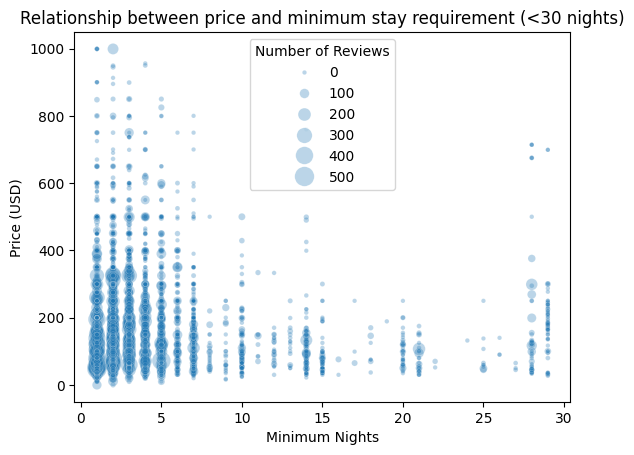

In [47]:
# 2.3

# Filter the Dataframe for minimum_nights < 30 days
filtered_df = df_AB[df_AB['minimum_nights'] < 30]

# Create scatter plot
sns.scatterplot(data = filtered_df, x='minimum_nights', y='price', alpha = 0.3, size = 'number_of_reviews', sizes=(10, 200))
plt.xlabel('Minimum Nights')
plt.ylabel('Price (USD)')
plt.legend(title='Number of Reviews')
plt.title('Relationship between price and minimum stay requirement (<30 nights)')
plt.show()

**Observed Patterns:**
- Most listings require a minimum stay of 1–7 nights. These listings cover a wide range of prices, but most are below $400.
- Listings with a minimum of 1–3 nights have the widest price range.
- There are fewer listings with a minimum stay above 7 nights, and the price range tend to be lower (except for those requiring 28–30 nights).
- Larger points (listings with more reviews) are mostly in the bottom left corner, especially those with 400–500 reviews. This means that listings with lower minimum nights and lower prices generally have more reviews.
- There are more listings at common booking intervals like 7, 14, 21, and 28–30 nights, suggesting hosts often set minimum stays to match weekly or monthly rental patterns.

**Business Insights:**
- **Flexibility**: Shorter minimum stay requirement attract more bookings and reviews. This gives guests more flexibility, which may help with last-minute bookings, short trips. Offering flexible minimum stays can increase occupancy and guest engagement.
- **Price sensitivity**: Lower prices correlate with higher engagement. Competitive pricing may drive more bookings and customer feedback.
- **Premium Listings Strategy**: High-priced listings may require stronger value propositions, such as premium amenities, unique experiences, or targeted marketing to justify the price and attract bookings.
- **Extended-Stay Opportunities**: The low density of long-stay listings could indicate either low demand or a chance to serve a niche market.
This could be a chance to attract extended-stay travelers/temporary housing by offering options tailored to their needs.





### 2.4

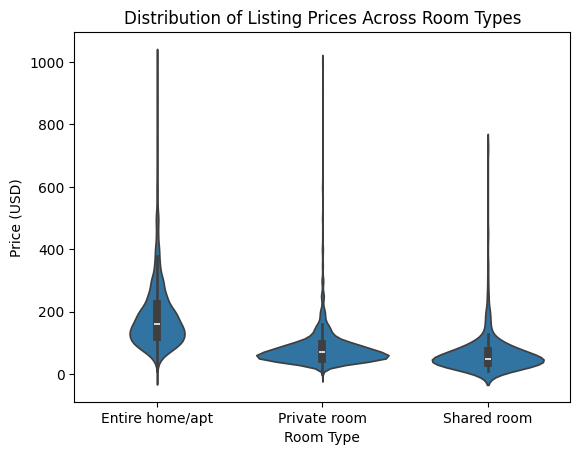

In [52]:
# 2.4

# Generate violin plot showing distribution of listing prices across room types.
sns.violinplot(data = df_AB, x='room_type', y='price')
plt.xlabel('Room Type')
plt.ylabel('Price (USD)')
plt.title('Distribution of Listing Prices Across Room Types')
plt.show()


**Observed Patterns:**
- A strong majority of listings have prices concentrated at the lower end regardless of room type.
- Entire home/apt listings have the highest median price (\$160) and the widest interquantile range (\$120.00 to \$225.00). This makes sense, as these listings can range from small apartments to luxury homes, resulting in significant differences in size, quality, and amenities.
- Private rooms and shared rooms have lower median prices. \$70 for Private Room and \$49 for Shared Room, with narrower interquantile range (Private room: \$50.00 to \$95.00; Shared room: \$35.00 to \$75.00). Most of these listings are also priced below \$200, making them more affordable options.
- All room types show long tails stretching far above the main cluster, which means there are cases where listings have much higher prices than the majority, potential outliers. For example, some entire homes are listed at over \$1000, showing a few premium listings with very high prices. There are also shared rooms listed near \$800, which is unusually high for this category and may reflect a luxury shared space or possibly a data entry error. Worth checking!
- Worth checking also the listings at $0

So:
- Affordability is a key driver in the NYC Airbnb market
- Entire homes have more pricing flexibility and revenue potential
- Private and shared rooms are the most affordable and consistent in price.
- The presence of long tails suggests there is a market for both budget and luxury travelers, but demand is at the lower end.
- Usually, location drive most of the price variation. It would be interesting to analyse the prices based on location. This could explain the almost \$800 shared bedroom(s).





In [70]:
# Filter for Private room listings
private_room_df = df_AB[df_AB['room_type'] == 'Private room']

# Calculate the 25th and 75th percentiles and IQR for Private room
q1_price_private_room = private_room_df['price'].quantile(0.25)
q3_price_private_room = private_room_df['price'].quantile(0.75)
iqr_price_private_room = q3_price_private_room - q1_price_private_room


# Filter for Shared room listings
shared_room_df = df_AB[df_AB['room_type'] == 'Shared room']

# Calculate the 25th and 75th percentiles and IQR for Shared room
q1_price_shared_room = shared_room_df['price'].quantile(0.25)
q3_price_shared_room = shared_room_df['price'].quantile(0.75)
iqr_price_shared_room = q3_price_shared_room - q1_price_shared_room

# Print the results
print(f"Price range for the majority (25th to 75th percentile) of 'Private room' listings: ${q1_price_private_room:.2f} to ${q3_price_private_room:.2f}")
print(f"Interquartile Range (IQR) for 'Private room' listings: ${iqr_price_private_room:.2f}\n")

print(f"Price range for the majority (25th to 75th percentile) of 'Shared room' listings: ${q1_price_shared_room:.2f} to ${q3_price_shared_room:.2f}")
print(f"Interquartile Range (IQR) for 'Shared room' listings: ${iqr_price_shared_room:.2f}")

Price range for the majority (25th to 75th percentile) of 'Private room' listings: $50.00 to $95.00
Interquartile Range (IQR) for 'Private room' listings: $45.00

Price range for the majority (25th to 75th percentile) of 'Shared room' listings: $35.00 to $75.00
Interquartile Range (IQR) for 'Shared room' listings: $40.00


### 2.5

For this exercise, I wanted to dig into the top 20 neighborhoods and differentiate active listings from those that are "likely inactive."
To do this, I created a simple categorization based on three factors: price, availability and review activity.

- If price ==0 → categorized as "Likely Inactive".
- If availability_365 == 0:
  - And number_of_reviews == 0 → categorized as "Likely Inactive".
  - Else, check last_review:
    - If last_review is before 2018 → categorized as "Likely Inactive".
    - If last_review is 2018 or later → categorized as "Active/Other".
- All other listings (availability_365 > 0) are categorized as "Active/Other" by default.

It would be helpful to have the first listing date in the dataset to better distinguish new listings from inactive ones. This could refine the categorization further.

Using this logic, I labeled each listing and focused on the top 20 neighborhoods by listing volume. I then visualized the breakdown using a horizontal stacked bar chart

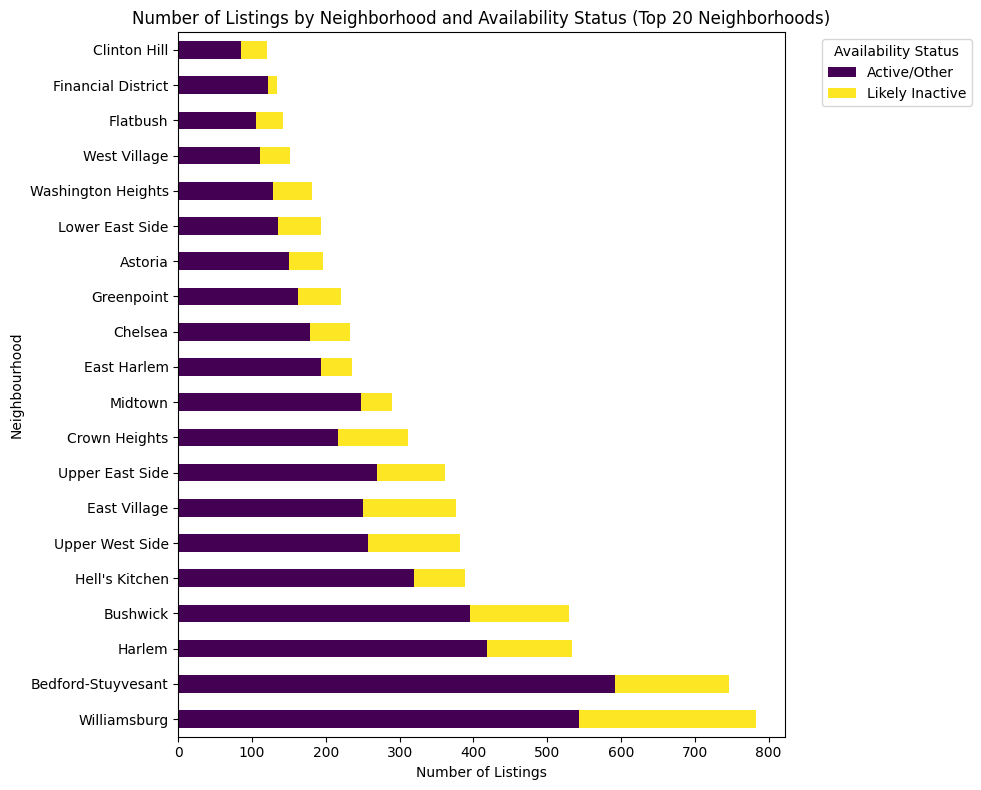

Percentage of total listings in the top 20 neighborhoods: 65.46%


In [74]:
#2.5

# Categorize listings based on availability and review status for "Likely Inactive"
def categorize_availability(row):
    # Classify listings with a price of $0 as "Likely Inactive"
    if row['price'] == 0:
        return 'Likely Inactive'

    if row['availability_365'] == 0:
        # Check for no reviews OR no recent reviews (in 2018 or 2019)
        if row['number_of_reviews'] == 0:
            return 'Likely Inactive'
        else:
            # Check for recent reviews (in 2018 or 2018) - assuming 'last_review' is datetime
            try:
                last_review_date = pd.to_datetime(row['last_review'])
                if last_review_date.year < 2018:
                     return 'Likely Inactive'
            except:
                 pass # Handle potential errors in date conversion

    return 'Active/Other' # Categorize all other listings


# Apply the categorization
df_AB['availability_status'] = df_AB.apply(categorize_availability, axis=1)


# Get top 20 neighborhoods by total number of listings, sorted descending
top_neighbourhoods = df_AB['neighbourhood'].value_counts().nlargest(20).index

# Filter and group the data by neighbourhood and availability status
df_top = df_AB[df_AB['neighbourhood'].isin(top_neighbourhoods)]
grouped_availability = df_top.groupby(['neighbourhood', 'availability_status'], observed=False).size().unstack(fill_value=0)

# Reindex the grouped dataframe based on the order of top_neighbourhoods
grouped_availability = grouped_availability.reindex(top_neighbourhoods)


# Plot horizontal stacked bar chart
grouped_availability.plot(kind='barh', stacked=True, figsize=(10, 8), colormap='viridis')

plt.xlabel('Number of Listings')
plt.ylabel('Neighbourhood')
plt.title('Number of Listings by Neighborhood and Availability Status (Top 20 Neighborhoods)')
plt.legend(title='Availability Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Calculate the total number of listings in the top 20 neighborhoods
total_listings_top_20 = df_top.shape[0]

# Get the total number of listings in the dataset
total_listings_dataset = df_AB.shape[0]

# Calculate the percentage
percentage_top_20 = (total_listings_top_20 / total_listings_dataset) * 100

# Print the result
print(f"Percentage of total listings in the top 20 neighborhoods: {percentage_top_20:.2f}%")

**Insights:**

This chart shows that just 10% of NYC neighborhoods account for 65% of all Airbnb listings, highlighting a strong concentration in a few popular areas. However, many of these high-volume neighborhoods also have a large share of likely inactive listings, which may signal oversaturation or regulatory pressure. This insight suggests an opportunity to explore smaller, less saturated neighborhoods with healthier listing activity and untapped demand.



### 2.6

Throughout this assignment, I used AI tools to accelerate my workflow, refine my code, and validate my analysis. Since I am not proficient in Python, these tools played a supportive role by helping me translate analytical ideas into working code and visualizations.

Gemini was especially helpful for generating visualizations like the violin plot in question 2.4, where I asked it to show price distributions across room types. I provided simple instructions, such as placing room_type on the x-axis and price on the y-axis, and Gemini returned clean, formatted code. It also helped me adjust plot aesthetics, including legend titles and axis labels, to improve clarity and presentation.

Gemini supported my coding process by interpreting comments and turning them into functional code. For example, when I wrote a comment like # Number of Airbnb located in Brooklyn, Gemini automatically generated the correct filtering logic. In question 2.4, Gemini also helped me add precision to my observations by calculating the median price for entire homes, private rooms, and shared rooms. I then asked it to calculate the range between the 25th and 75th percentiles to show where the middle 50% of prices fall for 'Entire home/apt' listings. I also asked Gemini to tall me how many listings had a price at $0 and it gave me the code to generate a total of 2.

For more complex logic and charting, I turned to Claude, especially in question 5 where I wanted to identify potentially inactive listings. I had a rough idea based on zero availability and review activity, and Claude helped me build and refine the categorization logic. Claude also provided helpful suggestions for improving my code, such as removing unnecessary plt.plot() in question 1.3 because sns.lineplot() already creates the plot. In question 2.3, it suggested filtering the data first and saving it as filtered_df, then using data=filtered_df in sns.scatterplot for clarity.

Claude also contributed strategic insights by suggesting that regulatory issues might be influencing the number of inactive listings in certain neighborhoods, which I hadn’t considered initially.

Before focusing on the inactive listings analysis, Gemini helped me quickly build exploratory charts, such as a scatter plot to look at the correlation between availability and number of reviews. Although I found no meaningful correlation, this rapid exploration allowed me to pivot toward more insightful directions. I also examined differences between hosts with multiple listings versus those with only one, to see if this impacted the number of reviews, but found no significant differences.

Overall, AI tools acted as collaborative partners throughout the assignment. They helped me write cleaner code, test ideas quickly, validate assumptions, and uncover strategic angles I might not have considered on my own. Their support was especially valuable given my limited experience with Python, enabling me to move from exploration to insight with greater speed and confidence.




